# Домашнее задание к лекции «Задачи классификации и кластеризации»


### Задание.

Текст задания также доступен тут http://prntscr.com/umci7o


- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
-Оставьте два признака - sepal_length и sepal_width и целевую переменную - -variety
-Разделите данные на выборку для обучения и тестирования
-Постройте модель LDA
-Визуализируйте предсказания для тестовой выборки и центры классов
-Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
-Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

### LDA

In [ ]:
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['variety'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data = df[['sepal_length', 'sepal_width', 'variety']]
data.head(2)

,sepal_length,sepal_width,variety
0,5.1,3.5,0
1,4.9,3.0,0


In [ ]:
X = data.drop('variety', axis=1)
y = data['variety']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(f'Всего записей: {X.shape[0]}, X_train:{X_train.shape[0] }, X_test:{X_test.shape[0]}')

Всего записей: 150, X_train:105, X_test:45


In [ ]:
# Создание инстанса модели LDA
lda = LinearDiscriminantAnalysis()

In [ ]:
# Обучение
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Предсказание классов
y_pred = lda.predict(X_test)
y_pred

array([2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2])

In [ ]:
pd.DataFrame({'Факт': y_test, 'Прогноз': y_pred}).head()

,Факт,Прогноз
87,1,2
111,2,2
10,0,0
91,1,1
49,0,0


In [ ]:
# Проверка классов на баланс
y.value_counts()

0    50
1    50
2    50
Name: variety, dtype: int64

Классы сбалансированные, поэтому можем применить метрику качества accuracy_score (доля верных ответов)

In [ ]:
accuracy_score(y_test, y_pred)

0.7777777777777778

In [ ]:
# Без импорта - альтернативный способ:
score = round(lda.score(X_test, y_test) * 100, 2)
score

77.78

In [ ]:
pd.DataFrame(lda.coef_, columns=X.columns)

,sepal_length,sepal_width
0,-5.790145,8.735475
1,1.965377,-4.647209
2,3.988550,-4.475533


Для каждого класса мы получаем весь 2-х признаков. Чем выше коэффициент, тем более значим признак для отделения соответствующего класса от всех остальных.

In [ ]:
# Центроиды
centroids = lda.means_
centroids

array([[5.04722222, 3.48055556],
       [5.94848485, 2.76666667],
       [6.54166667, 2.98333333]])

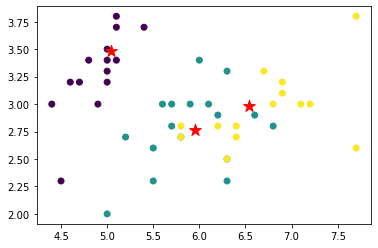

In [ ]:
# Визуализируем предсказания для тестовой выборки, а также отобразим центроиды этих групп

plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=y_test)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='*')
plt.show()

### Кластеризация

In [ ]:
df_cluster = data.drop('variety', axis=1)
df_cluster.head()


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
X_scaled = scaler.fit_transform(df_cluster)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

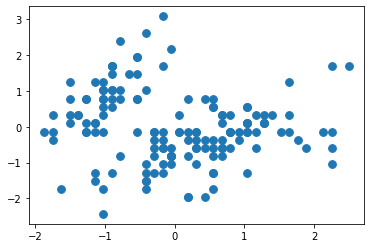

In [ ]:
# До кластеризации
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', s=60)
plt.show()

In [ ]:
# Определяем оптимальное кол-во кластеров - строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

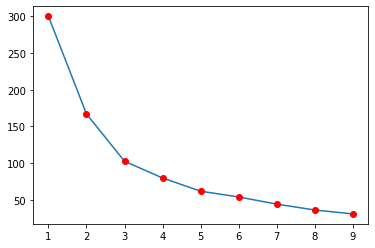

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')
plt.show()

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

На основании графика выбираю кол-во кластеров = 3

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

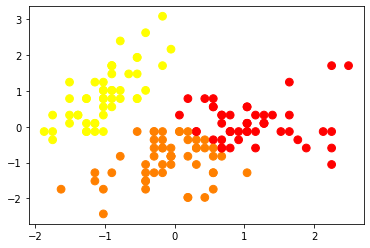

In [ ]:
# После кластеризации (3 кластера)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.show()